## Data Set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, derive_by_array, Matrix, sympify

In [2]:
x = np.array([0.45, 0.65, 0.7, 1, 1.25, 1.5, 2, 3, 3.8, 4.5, 5])  #1000 sq feet
y = np.array([1.7, 2, 2.5, 3, 4, 4.5, 7.5, 10, 15, 22, 30])     #Crore

## Cost Func

In [3]:
def cost(f):
    J = 1/(2*len(x))*np.sum(f**2)
    return J**0.5

## Grad descent

In [4]:
def grad(w, b):
    alp = 0.01
    w = w - alp*derive_by_array(cost(f),w)
    b = b - alp*derive_by_array(cost(f),b)
    return [w,b]

In [5]:
w1,w2,b = symbols('w1 w2 b', real = True)
w = np.array([w1, w2])
f = w1*x**2 + w2*x + b - y

RMS Cost: 8.60824129435381

RMS Cost: 7.96600981225210

RMS Cost: 7.32489282360173

RMS Cost: 6.68520112581295

RMS Cost: 6.04737149268349

RMS Cost: 5.41203669821262

RMS Cost: 4.78014712385205

RMS Cost: 4.15319321376160

RMS Cost: 3.53363800536322

RMS Cost: 2.92581994017266

RMS Cost: 2.33799163640639

RMS Cost: 1.78726346358095

RMS Cost: 1.31143854512027

RMS Cost: 0.984921042699297

RMS Cost: 0.861692408436198

RMS Cost: 0.844805785791417

RMS Cost: 0.843377312813540

No of iterations: 18
Coeff: [1.03176397081843 0.247761969715322]
Intercept: 1.07327658844387


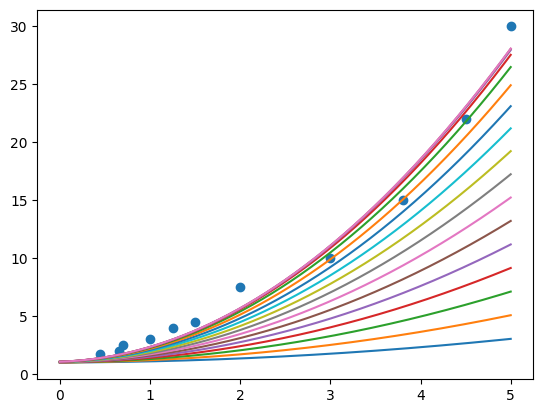

In [6]:
t = 0
prev_cost = 0
num_w = np.zeros(2)
num_b = 1
gr_w, gr_b = grad(w, b)
gr_w = Matrix(gr_w)
plt.scatter(x,y)
a = np.arange(0, 5, 0.001)
while True:
    t+=1
    f = num_w[0]*x**2 + num_w[1]*x + num_b - y
    
    num_w = gr_w.subs(w1,num_w[0]).subs(w2,num_w[1]).subs(b,num_b)
    num_b = gr_b.subs(w1,num_w[0]).subs(w2,num_w[1]).subs(b,num_b)
    num_w = np.reshape(num_w, (2,))
    
    if (abs(sympify(cost(f)).subs(w1,num_w[0]).subs(w2,num_w[1]).subs(b,num_b) - prev_cost) <= 0.001):
        break
    else:
        prev_cost = sympify(cost(f)).subs(w1,num_w[0]).subs(w2,num_w[1]).subs(b,num_b)
        print("RMS Cost:",prev_cost)
        print()
        
    plt.plot(a, num_w[0]*a**2 + num_w[1]*a + num_b)
    
print("No of iterations:",t)
print("Coeff:",num_w)
print("Intercept:",num_b)